# Harnessing Machine Learning for interpersonal physical alignment

### organize the data

In [156]:
import pandas as ps
from pandas import Series, DataFrame
import warnings
warnings.filterwarnings("ignore")

def dfbuilder(files):
    final=ps.DataFrame(columns=['Time_x', 'Experiment_x', ' Hand Type_x', ' # hands_x', ' Position X_x',
       ' Position Y_x', ' Position Z_x', ' Velocity X_x', ' Velocity Y_x',
       ' Velocity Z_x', ' Pitch_x', ' Roll_x', ' Yaw_x', ' Wrist Pos X_x',
       ' Wrist Pos Y_x', ' Wrist Pos Z_x', ' Elbow pos X_x', ' Elbow Pos Y_x',
       ' Elbow Pos Z_x', ' Grab Strenth_x', ' Grab Angle_x',' Pinch Strength_x', 
       'Time_y', 'Experiment_y',
       ' Hand Type_y', ' # hands_y', ' Position X_y', ' Position Y_y',
       ' Position Z_y', ' Velocity X_y', ' Velocity Y_y', ' Velocity Z_y',
       ' Pitch_y', ' Roll_y', ' Yaw_y', ' Wrist Pos X_y', ' Wrist Pos Y_y',
       ' Wrist Pos Z_y', ' Elbow pos X_y', ' Elbow Pos Y_y', ' Elbow Pos Z_y',
       ' Grab Strenth_y', ' Grab Angle_y', ' Pinch Strength_y'])
    for file in files:
        temp=ps.read_csv(file)
        temp=temp.ix[700:]
        temp[" Hand Type"]=Series([1 if i=="right" else 2 for i in temp[" Hand Type"]])
        if str.__contains__(file,"Alone"):  
            temp.insert(loc=1, column='Experiment', value="1")
            temp=temp.drop(' Frame ID',axis=1)
            Handright=ps.read_csv('HandRight.csv')
            Handright[" Hand Type"]=Series([1 if i=="right" else 2 for i in Handright[" Hand Type"]])
            Handright.insert(loc=1, column='Experiment', value="1")
            Handright = Handright.iloc[:len(temp)-1]
            Handright = Handright.reset_index(drop=True)
            Handright=Handright.drop(' Frame ID',axis=1)
            temp = temp.reset_index(drop=True)
            temp = ps.merge(temp, Handright, left_index=True, right_index=True)
        else:
            if str.__contains__(file,"Sync"):
                temp.insert(loc=1, column='Experiment', value="2")
            if str.__contains__(file,"Spontan"):
                temp.insert(loc=1, column='Experiment', value="3") 
            dfright=temp[temp[" Hand Type"]==1]
            dfleft=temp[temp[" Hand Type"]==2]
            dfright.set_index(' Frame ID',inplace=True)
            dfleft.set_index(' Frame ID',inplace=True)
            temp=ps.merge(dfleft, dfright, how='left',on=' Frame ID') 
        final=ps.concat([final,temp])
        
    final=final.drop(["Experiment_y"],axis=1) 
    final=final.dropna()
    return final

In [157]:
#i use glob to see and copy this list of files
files=['Evyatar636771052727603804Spontan.csv','Evyatar636771053639929594Sync.csv','Evyatar636771054555711409Alone.csv',
       'Nofar636759795182793299Spontan.csv','Nofar636759796290435160Alone.csv','Nofar636759797397919664Sync.csv',
       'Oriya636759804404113837Spontan.csv','Oriya636759805268396661Alone.csv','Oriya636759806131350399Sync.csv',
       'OryaB636771082736601528Alone.csv','OryaB636771083605535985Spontan.csv','OryaB636771084494502229Sync.csv',
       'Revital636770955999435879Alone.csv','Revital636770957038873193Spontan.csv','Revital636770957894370062Sync.csv',
       'Sachar636771045591258071Spontan.csv','Sachar636771046527112972Sync.csv','Sachar636771047408504303Alone.csv',
       'Shelly636759787508979097Spontan.csv','Shelly636759788383205274Alone.csv','Shelly636759789526313406Sync.csv',
       'Yael636771059544754823Spontan.csv','Yael636771060699529085Sync.csv','Yael636771061659067649Alone.csv',
       'Yoel636760921663075813Spontan.csv','Yoel636760922573364655Alone.csv','Yoel636760923490742912Sync.csv']

train= dfbuilder(files)
train.head()

,Time_x,Experiment_x,Hand Type_x,# hands_x,Position X_x,Position Y_x,Position Z_x,Velocity X_x,Velocity Y_x,Velocity Z_x,...,Yaw_y,Wrist Pos X_y,Wrist Pos Y_y,Wrist Pos Z_y,Elbow pos X_y,Elbow Pos Y_y,Elbow Pos Z_y,Grab Strenth_y,Grab Angle_y,Pinch Strength_y
129224,341.7967,3,2.0,2,-81.07576,188.0205,-6.599422,-3.531912,-34.794060,-51.33676,...,-0.454103,195.7942,174.3912,28.72469,277.2327,-25.76938,157.6368,0.0,0.106288,0.0
129226,341.8133,3,2.0,2,-81.06532,187.2831,-7.509534,-5.439296,-35.477880,-53.12909,...,-0.450451,196.1415,174.7783,28.34431,278.0301,-25.50721,156.7763,0.0,0.112178,0.0
129228,341.8307,3,2.0,2,-81.30278,186.7463,-8.332627,-14.389670,-31.827650,-44.94197,...,-0.447981,196.6401,175.1746,27.94244,279.6292,-23.55376,158.0756,0.0,0.136341,0.0
129230,341.8468,3,2.0,2,-81.70728,186.4145,-9.010276,-26.437670,-17.545160,-36.06673,...,-0.447134,197.2184,175.6191,27.47637,281.9268,-20.49721,160.4339,0.0,0.152158,0.0
129232,341.8634,3,2.0,2,-82.14220,186.4485,-9.670983,-20.348470,2.364992,-39.13349,...,-0.452682,197.8856,176.1802,27.03134,285.1833,-15.53749,164.6476,0.0,0.159900,0.0


In [158]:
files=['Itiel636770940701219076Spontan.csv','Itiel636770941638547912Sync.csv',
       'Itiel636770942529041679Alone.csv','Mor636771064635567065Spontan.csv','Mor636771065531910215Sync.csv',
       'Mor636771066407626524Alone.csv','Oded636754669540564461Alone.csv','Oded636754670490266956Spontan.csv',
       'Oded636754671560850581Sync.csv']

test=dfbuilder(files)
test.head()

,Time_x,Experiment_x,Hand Type_x,# hands_x,Position X_x,Position Y_x,Position Z_x,Velocity X_x,Velocity Y_x,Velocity Z_x,...,Yaw_y,Wrist Pos X_y,Wrist Pos Y_y,Wrist Pos Z_y,Elbow pos X_y,Elbow Pos Y_y,Elbow Pos Z_y,Grab Strenth_y,Grab Angle_y,Pinch Strength_y
91071,778.7908,3,2.0,2,-159.0957,208.6001,34.44760,-153.46560,-19.23369,142.596900,...,-0.374528,191.0542,110.6024,44.65841,374.9221,6.802368,181.0962,0.0,0.227929,0.0
91072,778.8074,3,2.0,2,-160.3589,208.8600,35.48700,-146.07110,30.04198,120.190100,...,-0.364171,189.9664,109.4695,44.68486,371.8003,6.902730,184.7336,0.0,0.237632,0.0
91074,778.8237,3,2.0,2,-161.3794,209.7227,36.49498,-23.05849,34.26007,37.051240,...,-0.353171,188.8850,108.4054,44.56445,363.2791,9.282867,196.0854,0.0,0.263611,0.0
91076,778.8403,3,2.0,2,-160.7309,209.1581,36.61923,39.17453,-45.31736,6.617132,...,-0.346412,187.9633,107.9770,44.40394,352.5795,13.056210,208.9905,0.0,0.276191,0.0
91078,778.8572,3,2.0,2,-160.3435,208.4809,36.50238,18.21259,-41.30220,-8.726838,...,-0.337276,187.1984,108.1623,44.37620,341.3692,14.157600,219.2810,0.0,0.288270,0.0


## graph

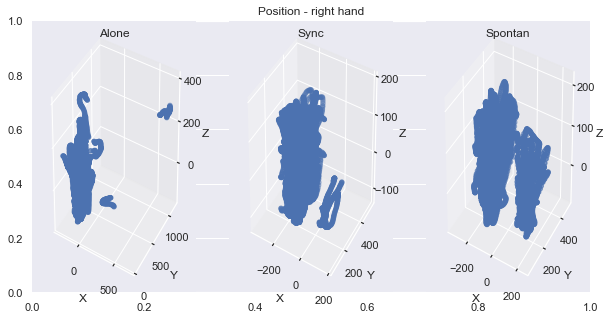

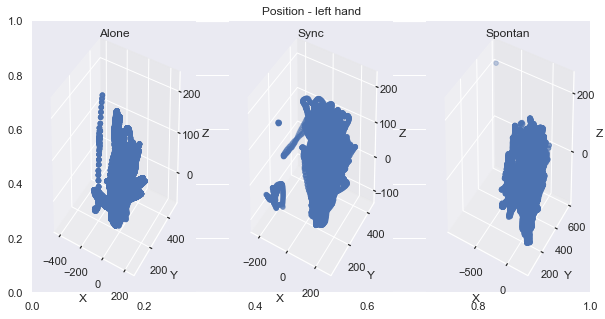

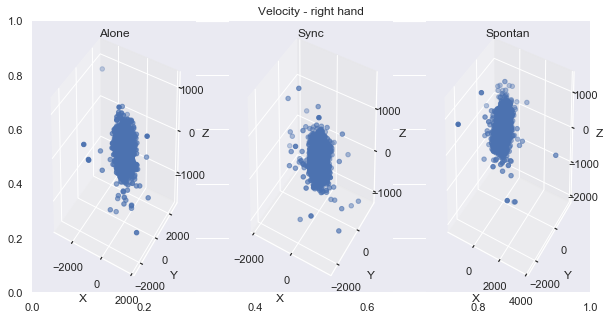

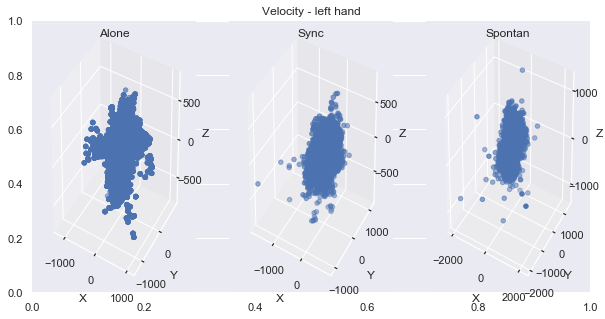

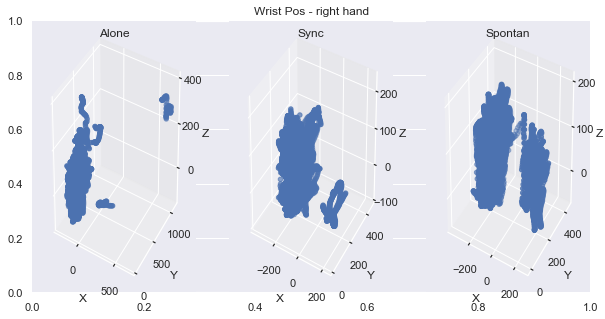

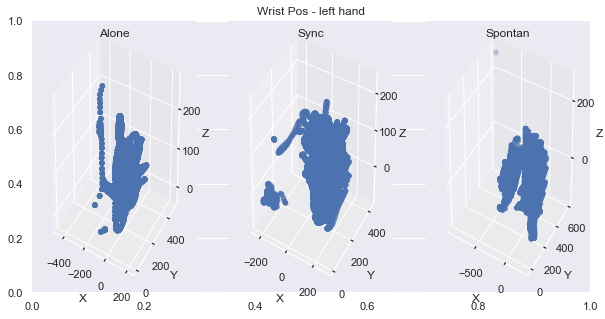

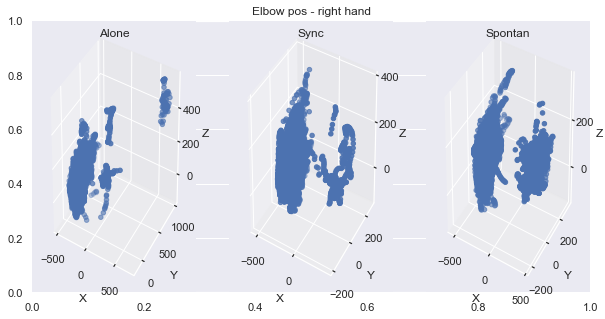

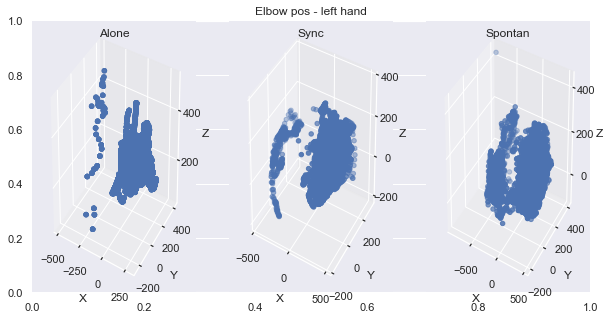

In [159]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

for pose in ["Position", "Velocity", "Wrist Pos"]:
    fig = plt.figure(figsize=(10,5))
    plt.title(pose+" - right hand")
    for i in range(1,4):
        ax = fig.add_subplot(1,3,i, projection='3d')
        x = train[train['Experiment_x']==str(i)][" "+pose+" X_x"]
        y = train[train['Experiment_x']==str(i)][" "+pose+" Y_x"]
        z = train[train['Experiment_x']==str(i)][" "+pose+" Z_x"]
        ax.scatter(x, y, z,)
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_zlabel('Z')
        if(i==1):
            plt.title("Alone")
        else:
            if(i==2):
                plt.title("Sync")
            else:
                plt.title("Spontan")
        
    fig = plt.figure(figsize=(10,5))
    plt.title(pose+" - left hand")   
    for i in range(1,4):   
        ax = fig.add_subplot(1,3,i, projection='3d')
        x = train[train['Experiment_x']==str(i)][" "+pose+" X_y"]
        y = train[train['Experiment_x']==str(i)][" "+pose+" Y_y"]
        z = train[train['Experiment_x']==str(i)][" "+pose+" Z_y"]
        ax.scatter(x, y, z,)
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_zlabel('Z')
        if(i==1):
            plt.title("Alone")
        else:
            if(i==2):
                plt.title("Sync")
            else:
                plt.title("Spontan")

fig = plt.figure(figsize=(10,5))
plt.title("Elbow pos - right hand")
for i in range(1,4):   
    ax = fig.add_subplot(1,3,i, projection='3d')
    x = train[train['Experiment_x']==str(i)][" Elbow pos X_x"]
    y = train[train['Experiment_x']==str(i)][" Elbow Pos Y_x"]
    z = train[train['Experiment_x']==str(i)][" Elbow Pos Z_x"]
    ax.scatter(x, y, z,)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    if(i==1):
        plt.title("Alone")
    else:
        if(i==2):
            plt.title("Sync")
        else:
            plt.title("Spontan")
        
fig = plt.figure(figsize=(10,5))
plt.title("Elbow pos - left hand")   
for i in range(1,4):   
    ax = fig.add_subplot(1,3,i, projection='3d')
    x = train[train['Experiment_x']==str(i)][" Elbow pos X_y"]
    y = train[train['Experiment_x']==str(i)][" Elbow Pos Y_y"]
    z = train[train['Experiment_x']==str(i)][" Elbow Pos Z_y"]
    ax.scatter(x, y, z,)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    if(i==1):
        plt.title("Alone")
    else:
        if(i==2):
            plt.title("Sync")
        else:
            plt.title("Spontan")
plt.show()

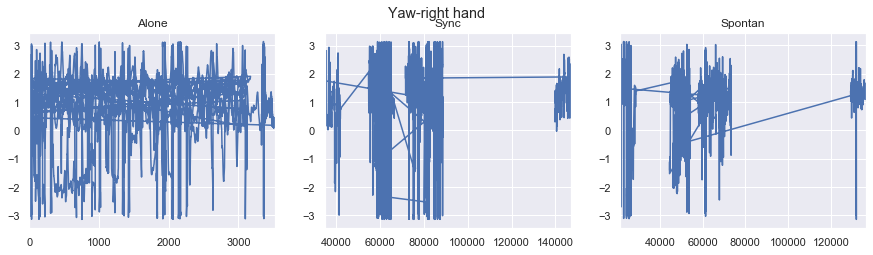

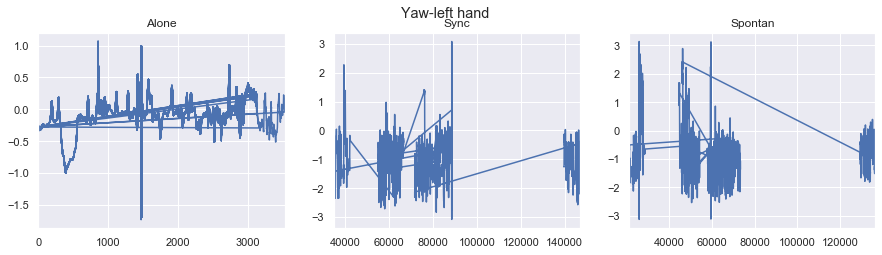

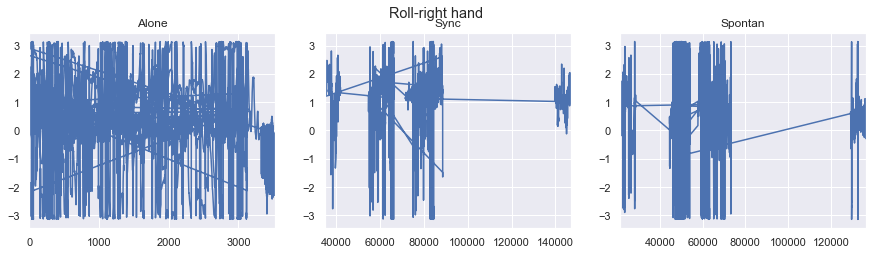

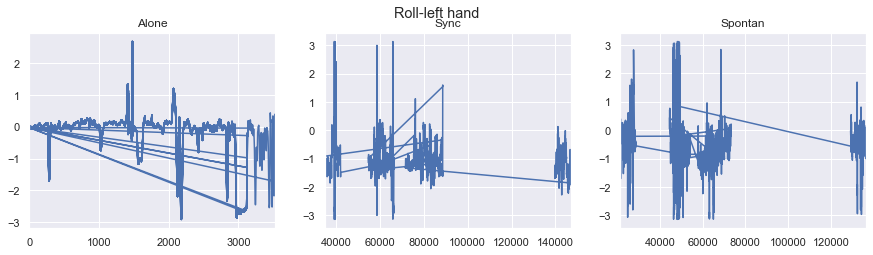

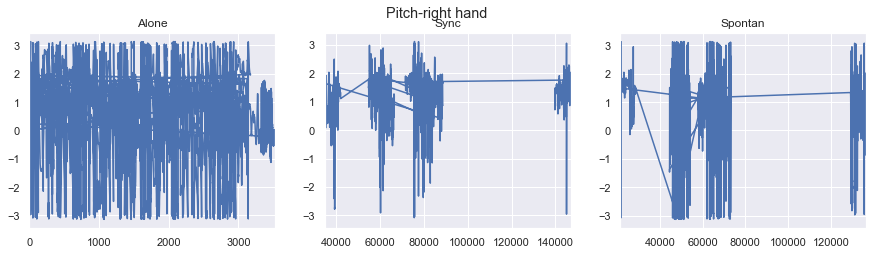

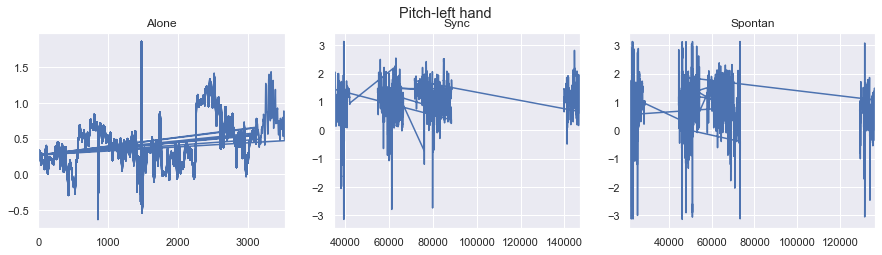

In [160]:
import seaborn as sns
sns.set()
for move in [" Yaw"," Roll"," Pitch"]:
    fig=plt.figure(figsize=(15,3.6))
    fig.suptitle(move+"-right hand")    
    for i in range(1,4):
        plt.subplot(1,3,i)
        train[train['Experiment_x']==str(i)][move+'_x'].plot()
        if(i==1):
            plt.title("Alone")
        else:
            if(i==2):
                plt.title("Sync")
            else:
                plt.title("Spontan")
       
    fig=plt.figure(figsize=(15,3.6))
    fig.suptitle(move+"-left hand")    
    for i in range(1,4):
        plt.subplot(1,3,i)
        train[train['Experiment_x']==str(i)][move+'_y'].plot()
        if(i==1):
            plt.title("Alone")
        else:
            if(i==2):
                plt.title("Sync")
            else:
                plt.title("Spontan")

1 = Alone
2 = Sync
3 = Spontan


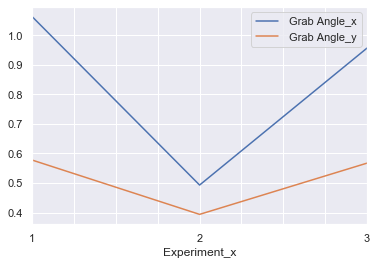

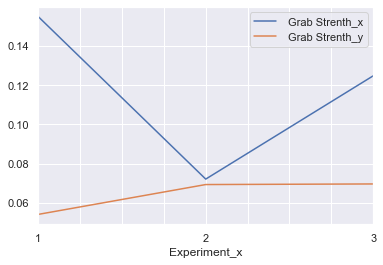

In [161]:
train.groupby(['Experiment_x'])[' Grab Angle_x',' Grab Angle_y'].mean().plot()
train.groupby(['Experiment_x'])[' Grab Strenth_x',' Grab Strenth_y'].mean().plot()
print("1 = Alone")
print("2 = Sync")
print("3 = Spontan")

# Models

In [162]:

X_train=train[['Time_x', ' Hand Type_x', ' Position X_x',
       ' Position Y_x', ' Position Z_x', ' Velocity X_x', ' Velocity Y_x',
       ' Velocity Z_x', ' Pitch_x', ' Roll_x', ' Yaw_x', ' Wrist Pos X_x',
       ' Wrist Pos Y_x', ' Wrist Pos Z_x', ' Elbow pos X_x', ' Elbow Pos Y_x',
       ' Elbow Pos Z_x', ' Grab Strenth_x', ' Grab Angle_x',
       ' Pinch Strength_x', 'Time_y', ' Hand Type_y',
       ' Position X_y', ' Position Y_y', ' Position Z_y',
       ' Velocity X_y', ' Velocity Y_y', ' Velocity Z_y', ' Pitch_y',
       ' Roll_y', ' Yaw_y', ' Wrist Pos X_y', ' Wrist Pos Y_y',
       ' Wrist Pos Z_y', ' Elbow pos X_y', ' Elbow Pos Y_y', ' Elbow Pos Z_y',
       ' Grab Strenth_y', ' Grab Angle_y', ' Pinch Strength_y']]
y_train=train['Experiment_x']
X_test=test[['Time_x', ' Hand Type_x', ' Position X_x',
       ' Position Y_x', ' Position Z_x', ' Velocity X_x', ' Velocity Y_x',
       ' Velocity Z_x', ' Pitch_x', ' Roll_x', ' Yaw_x', ' Wrist Pos X_x',
       ' Wrist Pos Y_x', ' Wrist Pos Z_x', ' Elbow pos X_x', ' Elbow Pos Y_x',
       ' Elbow Pos Z_x', ' Grab Strenth_x', ' Grab Angle_x',
       ' Pinch Strength_x', 'Time_y', ' Hand Type_y',
       ' Position X_y', ' Position Y_y', ' Position Z_y',
       ' Velocity X_y', ' Velocity Y_y', ' Velocity Z_y', ' Pitch_y',
       ' Roll_y', ' Yaw_y', ' Wrist Pos X_y', ' Wrist Pos Y_y',
       ' Wrist Pos Z_y', ' Elbow pos X_y', ' Elbow Pos Y_y', ' Elbow Pos Z_y',
       ' Grab Strenth_y', ' Grab Angle_y', ' Pinch Strength_y']]
y_test=test['Experiment_x']
print("Training FeatureSet:", X_train.shape)
print("Training Labels:", y_train.shape)
print("Testing FeatureSet:", X_test.shape)
print("Testing Labels:", y_test.shape)

Training FeatureSet: (88369, 40)
Training Labels: (88369,)
Testing FeatureSet: (25233, 40)
Testing Labels: (25233,)


In [163]:
train[train.index%20==3].shape

(4470, 43)

In [164]:
from sklearn.dummy import DummyClassifier
dummy = DummyClassifier()
dummy.fit(X_train, y_train)
print("test score:",dummy.score(X_test,y_test))
print("train score:",dummy.score(X_train,y_train))

test score: 0.33281813498196805
train score: 0.33698468920096414


## naive_bayes

In [165]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf=clf.fit(X_train,y_train)
print("test score:",clf.score(X_test,y_test))
print("train score:",clf.score(X_train,y_train))

test score: 0.7195735742876392
train score: 0.8046713213909855


In [166]:
GaussianNB()

GaussianNB(priors=None, var_smoothing=1e-09)

In [167]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X_train)
X_t_train = pca.transform(X_train)
X_t_test = pca.transform(X_test)
print("Score from the PCA")
print("test score:",clf.score(X_t_test,y_test))
print("train score:",clf.score(X_t_train,y_train))

Score from the PCA
test score: 0.291879681369635
train score: 0.2967330172345506


In [168]:
from sklearn.decomposition import FastICA
ica = FastICA()
ica.fit(X_train)
X_t_train = ica.transform(X_train)
X_t_test = ica.transform(X_test)
print("Score from the ICA")
print("test score:",clf.score(X_t_test,y_test))
print("train score:",clf.score(X_t_train,y_train))

Score from the ICA
test score: 0.2918400507272223
train score: 0.2967330172345506


In [169]:
from sklearn.metrics import f1_score
y_pred_class=clf.predict(X_test)
f1_score(y_test, y_pred_class,average='weighted')

0.7123146322602127

In [170]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_class))

              precision    recall  f1-score   support

           1       1.00      0.92      0.96      7364
           2       0.59      0.84      0.70      8806
           3       0.67      0.44      0.53      9063

    accuracy                           0.72     25233
   macro avg       0.75      0.73      0.73     25233
weighted avg       0.74      0.72      0.71     25233



## Logistic Regression

In [171]:
#X_train=train[[ ' Elbow pos X_x', ' Elbow Pos Z_x','Time_y']]
#X_test=test[[ ' Elbow pos X_x', ' Elbow Pos Z_x','Time_y']]
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter=21,C=15600)
logreg.fit(X_train, y_train)
print("test score:",logreg.score(X_test,y_test))
print("train score:",logreg.score(X_train,y_train))

test score: 0.6762572821305434
train score: 0.9181952947300523


In [172]:
LogisticRegression()

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [77]:
pca = PCA()
pca.fit(X_train)
X_t_train = pca.transform(X_train)
X_t_test = pca.transform(X_test)
print("Score from the PCA")
print("test score:",logreg.score(X_t_test,y_test))
print("train score:",logreg.score(X_t_train,y_train))

Score from the PCA
test score: 0.377373417721519
train score: 0.3527272727272727


In [78]:
ica = FastICA()
ica.fit(X_train)
X_t_train = ica.transform(X_train)
X_t_test = ica.transform(X_test)
print("Score from the ICA")
print("test score:",logreg.score(X_t_test,y_test))
print("train score:",logreg.score(X_t_train,y_train))

Score from the ICA
test score: 0.3615506329113924
train score: 0.35454545454545455


In [79]:
y_press_class=logreg.predict(X_test)
f1_score(y_test, y_pred_class,average='weighted')

0.6964331532655617

In [80]:
print(classification_report(y_test, y_pred_class))

              precision    recall  f1-score   support

           1       1.00      0.90      0.95       369
           2       0.58      0.83      0.68       438
           3       0.64      0.43      0.51       457

    accuracy                           0.70      1264
   macro avg       0.74      0.72      0.71      1264
weighted avg       0.72      0.70      0.70      1264



## ADABOOST

In [112]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(n_estimators=3,base_estimator=GaussianNB())
clf=clf.fit(X_train,y_train)
print("test score:",clf.score(X_test,y_test))
print("train score:",clf.score(X_train,y_train))

test score: 0.7136075949367089
train score: 0.765


In [82]:
AdaBoostClassifier()

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)

In [83]:
pca = PCA()
pca.fit(X_train)
X_t_train = pca.transform(X_train)
X_t_test = pca.transform(X_test)
print("Score from the PCA")
print("test score:",clf.score(X_t_test,y_test))
print("train score:",clf.score(X_t_train,y_train))

Score from the PCA
test score: 0.4438291139240506
train score: 0.5038636363636364


In [84]:
from sklearn.decomposition import FastICA
ica = FastICA()
ica.fit(X_train)
X_t_train = ica.transform(X_train)
X_t_test = ica.transform(X_test)
print("Score from the ICA")
print("test score:",clf.score(X_t_test,y_test))
print("train score:",clf.score(X_t_train,y_train))

Score from the ICA
test score: 0.3852848101265823
train score: 0.30454545454545456


In [85]:
y_press_class=clf.predict(X_test)
f1_score(y_test, y_pred_class,average='weighted')

0.6964331532655617

In [86]:
print(classification_report(y_test, y_pred_class))

              precision    recall  f1-score   support

           1       1.00      0.90      0.95       369
           2       0.58      0.83      0.68       438
           3       0.64      0.43      0.51       457

    accuracy                           0.70      1264
   macro avg       0.74      0.72      0.71      1264
weighted avg       0.72      0.70      0.70      1264

